#### Question 1

A customer informed their consultant that they have developed <b> several formulations of petrol</b> 
that gives <b>different characteristics of burning pattern.</b> <br> The formulations are obtaining <b> by adding
varying levels of additives</b> that, for example, prevent engine knocking, gum prevention, stability 
in storage, and etc. <br> However, a third party certification organisation would like to verify if the
formulations are significantly different, and request for both physical and statistical proof. Since
the formulations are confidential information, they are not named in the dataset. <br>
Please assist the consultant in the area of statistical analysis by doing this; <br>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
ingedient_file_path = './ingredient.csv'
ingredient = pd.read_csv(ingedient_file_path)

In [16]:
ingredient.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


>## Table Content
1. [Descriptive Analysis of additives](#ch1)
2. [Graphical analysis of the additives](#ch2)
3. [The distinctive numberof formulations present](#ch3)

<a id = 'ch1'></a>
### Descriptive Analysis of additives 

This is the section that we performed the data analysis on the given dataset, ingredients.<br>
Firstly, we checked the <b> descriptive statistics</b> (min, max, mean, standard deviation) on dataset to gain the first insight.

In [17]:
ingredient.describe().T

,count,mean,std,min,25%,50%,75%,max
a,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
b,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
c,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
d,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
e,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
f,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
g,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
h,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
i,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


<b>Observation:</b>
<br><br>
This dataset dont have any null values. However, from the mean value we can observed that the additives are not standardized as contain different scaling. <br>

<strong> 0 - 1 </strong>: f, h, i <br> 
<strong> 1 - 3 </strong>: a, c, d <br>
<strong> 3 - 10 </strong>: g <br>
<strong> >10 </strong> : e

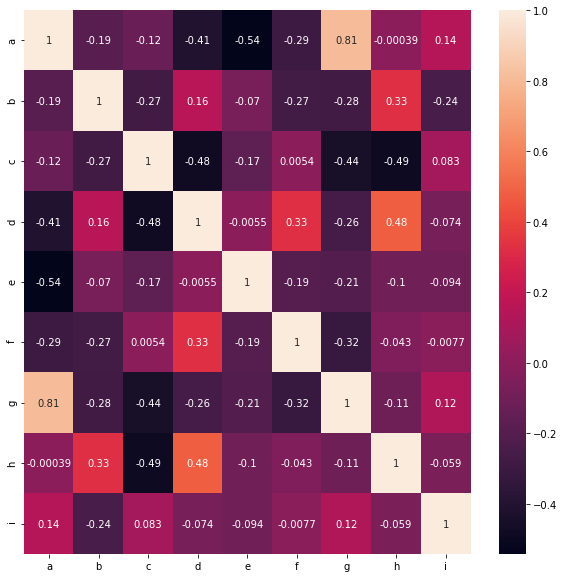

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(ingredient.corr(), annot = True)
plt.show()

<b>Observation:</b>

There's a strong relationship between column d & column h. The correlation is 48% among them.

##### Hypothesis Testing

In order to understand deeper on dataset, We have initial the hypothesis testing to understand the relationship between 2 additives. <br> In this section, we will using 2 sample T-test to validate the hypothesis. <br> <br>

Null hypothesis: There's a difference between 2 additives.<br>
Alternative hypothesis: There's no difference between 2 additives.<br>

In [6]:
def two_sampled_t_test(column_a, column_b):
    group_a = ingredient[column_a]
    group_b = ingredient[column_b]
    
    _, p_value = ttest_ind(a = group_a, b = group_b, equal_var = False)
    if p_value <= 0.05:
        print(f'p_value: {p_value} Reject the null hypothesis')
    else:
        print(f'p_value: {p_value} Failed to reject the null hypothesis, reject the alternative hypothesis')

In [22]:
two_sampled_t_test('d', 'h')

p_value: 1.5340033352272144e-91 Reject the null hypothesis


<a id = 'ch2'></a>

### A graphical analysis of the additives

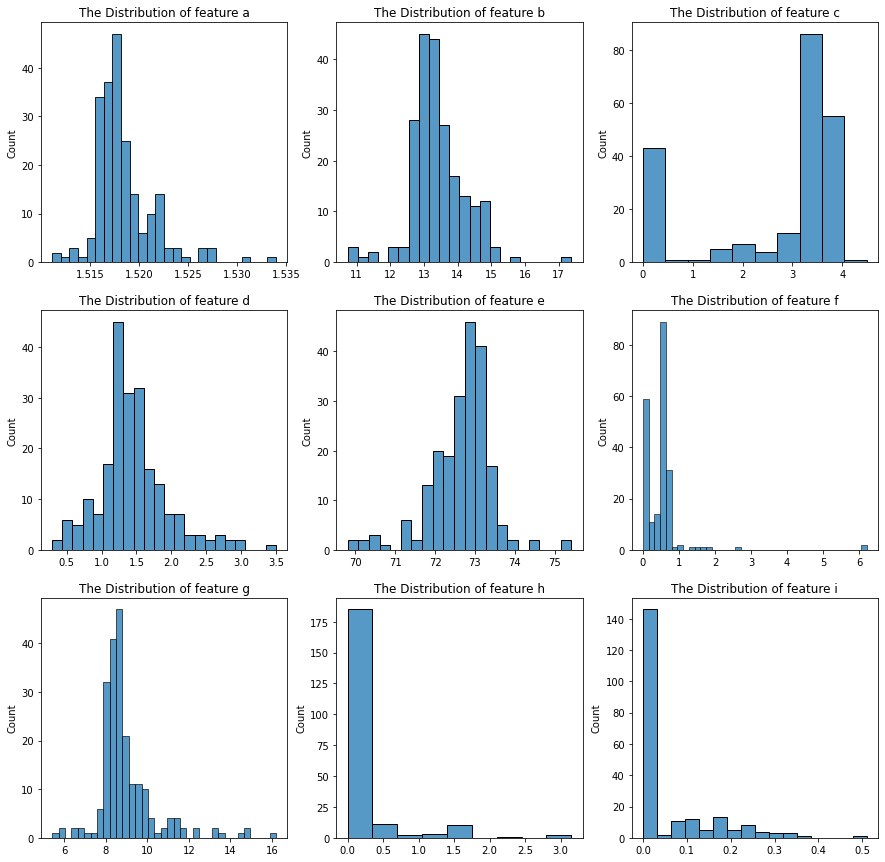

In [15]:
f, ax = plt.subplots(3,3, figsize = (15,15))
k = 0

for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data = ingredient.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {ingredient.columns[k]}")
        ax[i,j].set(xlabel=None)
        k += 1
plt.show()

<b>Observation:</b>

Most of the columns distribution are in right skewed. Which are columns f, h, i. <br>
But columns a, b, d, e are follow the normal distribution. <br>

<a id = 'ch3'></a>
### The distinctive number of formulations present

In this section, we are looking for the optimal numbers of formulations among all 214 combinations. <br>
Below tests will using Kmeans algorithm. <br>
We are using Elbow method & identify the best optimal number by WCSS.

In [26]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 300)
    kmeans.fit(ingredient)
    wcss.append(kmeans.inertia_)
    print('Number of Clusters: {},  WCSS: {}'.format(i,kmeans.inertia_))

Number of Clusters: 1,  WCSS: 1342.7570466443026
Number of Clusters: 2,  WCSS: 820.0278544371245
Number of Clusters: 3,  WCSS: 589.0314496288754
Number of Clusters: 4,  WCSS: 491.06631931428575
Number of Clusters: 5,  WCSS: 400.53174126774223
Number of Clusters: 6,  WCSS: 338.7448885161779
Number of Clusters: 7,  WCSS: 292.6147761478794
Number of Clusters: 8,  WCSS: 266.72903408820014
Number of Clusters: 9,  WCSS: 245.3509223188667
Number of Clusters: 10,  WCSS: 228.4358647734796


<b>Observation:</b>

Based from the results, we found that the optimal number is 5.